In [2]:
import pandas as pd

In [3]:
customer_df = pd.read_csv("customers.csv")
accounts_df = pd.read_csv("accounts.csv")
loans_df = pd.read_csv("loans.csv")
transactions_df = pd.read_csv("transactions.csv")

In [4]:
print("Customer Info:")
customer_df.info()
print("Accounts Info:")
accounts_df.info()
print("Loans Info:")
loans_df.info()
print("Transactions Info:")
transactions_df.info()

Customer Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      1111 non-null   int64 
 1   FirstName       1089 non-null   object
 2   LastName        1088 non-null   object
 3   DateOfBirth     1111 non-null   object
 4   AddressID       1111 non-null   int64 
 5   CustomerTypeID  1111 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 52.2+ KB
Accounts Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountID        1667 non-null   int64  
 1   CustomerID       1667 non-null   int64  
 2   AccountTypeID    1667 non-null   int64  
 3   AccountStatusID  1667 non-null   int64  
 4   Balance          1667 non-null   float64
 5   OpeningDate      1634 non-nu

In [5]:
customer_df['DateOfBirth'] = pd.to_datetime(customer_df['DateOfBirth'], errors = 'coerce')
accounts_df['OpeningDate'] = pd.to_datetime(accounts_df['OpeningDate'], errors = 'coerce')
loans_df['StartDate'] = pd.to_datetime(loans_df['StartDate'], errors = 'coerce')
loans_df['EstimatedEndDate'] = pd.to_datetime(loans_df['EstimatedEndDate'], errors = 'coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors = 'coerce')

In [6]:

transactions_df = pd.read_csv('transactions.csv')

transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

transactions_df = transactions_df.dropna(subset=['TransactionDate'])

print("Transactions Info")
transactions_df.info()

Transactions Info
<class 'pandas.core.frame.DataFrame'>
Index: 49000 entries, 0 to 49998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionID         49000 non-null  int64         
 1   AccountOriginID       49000 non-null  int64         
 2   AccountDestinationID  49000 non-null  int64         
 3   TransactionTypeID     49000 non-null  int64         
 4   Amount                49000 non-null  float64       
 5   TransactionDate       49000 non-null  datetime64[ns]
 6   BranchID              49000 non-null  int64         
 7   Description           49000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.4+ MB


In [7]:
customer_df = customer_df.dropna(subset=['FirstName', 'LastName'])
accounts_df = accounts_df.dropna(subset=['OpeningDate'])
loans_df = loans_df.dropna(subset=['StartDate', 'EstimatedEndDate'])

In [8]:
loans_accounts_df = pd.merge(loans_df, accounts_df, on ='AccountID', how = 'left')
master_df = pd.merge(loans_accounts_df, customer_df, on = 'CustomerID', how = 'left')

In [9]:
print('--- Master Info ---')
master_df.info()

--- Master Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   LoanID            330 non-null    int64         
 1   AccountID         330 non-null    int64         
 2   LoanStatusID      330 non-null    int64         
 3   PrincipalAmount   330 non-null    float64       
 4   InterestRate      330 non-null    float64       
 5   StartDate         330 non-null    datetime64[ns]
 6   EstimatedEndDate  330 non-null    datetime64[ns]
 7   CustomerID        319 non-null    float64       
 8   AccountTypeID     319 non-null    float64       
 9   AccountStatusID   319 non-null    float64       
 10  Balance           319 non-null    float64       
 11  OpeningDate       319 non-null    datetime64[ns]
 12  FirstName         307 non-null    object        
 13  LastName          307 non-null    object        
 14  DateOf

In [10]:
master_df = master_df.dropna()

In [11]:
loan_statuses_df = pd.read_csv('loan_statuses.csv')
final_df = pd.merge(master_df, loan_statuses_df, on = 'LoanStatusID')

In [12]:
print('--- Final Info ---')
final_df.info()

--- Final Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   LoanID            290 non-null    int64         
 1   AccountID         290 non-null    int64         
 2   LoanStatusID      290 non-null    int64         
 3   PrincipalAmount   290 non-null    float64       
 4   InterestRate      290 non-null    float64       
 5   StartDate         290 non-null    datetime64[ns]
 6   EstimatedEndDate  290 non-null    datetime64[ns]
 7   CustomerID        290 non-null    float64       
 8   AccountTypeID     290 non-null    float64       
 9   AccountStatusID   290 non-null    float64       
 10  Balance           290 non-null    float64       
 11  OpeningDate       290 non-null    datetime64[ns]
 12  FirstName         290 non-null    object        
 13  LastName          290 non-null    object        
 14  DateOfB

In [13]:
final_df['IsDefault'] = final_df['StatusName'].apply(lambda x: 1 if x == 'Overdue' else 0)

In [14]:
# Calculating the difference between end and start dates in days
time_difference = final_df['EstimatedEndDate'] - final_df['StartDate']

In [15]:
#assuming one month equals to 30.44 days
final_df['LoanDurationMonths'] = (time_difference.dt.days/30.44).round()

In [16]:
# Calculating age when the loan was started
final_df['CustomerAgeAtLoan'] = (final_df['StartDate'] - final_df['DateOfBirth']).dt.days//365

In [17]:
# Calculating the age of the bank account when the loan was taken
final_df['AccountAgeAtLoan'] = (final_df['StartDate'] - final_df['OpeningDate']).dt.days

In [18]:
final_df.tail()

,LoanID,AccountID,LoanStatusID,PrincipalAmount,InterestRate,StartDate,EstimatedEndDate,CustomerID,AccountTypeID,AccountStatusID,...,FirstName,LastName,DateOfBirth,AddressID,CustomerTypeID,StatusName,IsDefault,LoanDurationMonths,CustomerAgeAtLoan,AccountAgeAtLoan
285,400258,200278,1,34916.57,0.0796,2022-10-17,2023-11-17,10912.0,1.0,1.0,...,Mariano,Bean,1976-12-10,95.0,2.0,Active,0,13.0,45,609
286,400008,200379,1,47534.75,0.1395,2021-05-20,2025-09-10,10460.0,5.0,1.0,...,Sherly,Spears,1985-11-18,627.0,1.0,Active,0,52.0,35,661
287,400091,201053,1,47644.19,0.0822,2022-12-03,2026-07-17,10603.0,1.0,3.0,...,Harley,Yates,1994-07-25,825.0,2.0,Active,0,43.0,28,1058
288,400056,200691,1,65871.54,0.1185,2021-05-22,2023-01-22,10535.0,5.0,1.0,...,Muoi,Horton,1966-03-07,843.0,2.0,Active,0,20.0,55,748
289,400212,200447,1,89845.11,0.1394,2022-01-31,2024-02-12,10940.0,5.0,1.0,...,Minna,Mccall,1964-05-13,1208.0,2.0,Active,0,24.0,57,297


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Select your features (X) and target (y)
features = ['PrincipalAmount', 'InterestRate', 'Balance', 'LoanDurationMonths', 'CustomerAgeAtLoan', 'AccountAgeAtLoan']
target = 'IsDefault'

X = final_df[features]
y = final_df[target]

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the scaler
scaler = StandardScaler()

# 4. Create your X_train_scaled and X_test_scaled variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been re-split and re-scaled successfully!")

Data has been re-split and re-scaled successfully!


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
smote = SMOTE(random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [41]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [42]:
predictions = model.predict(X_test_scaled)

In [43]:
print("--- Random Forest Model with SMOTE Evaluation ---")
print(f"Model Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, predictions))
print("\n--- Classification Report ---")
print(classification_report(y_test, predictions))

--- Random Forest Model with SMOTE Evaluation ---
Model Accuracy: 81.03%

--- Confusion Matrix ---
[[45  7]
 [ 4  2]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        52
           1       0.22      0.33      0.27         6

    accuracy                           0.81        58
   macro avg       0.57      0.60      0.58        58
weighted avg       0.85      0.81      0.83        58



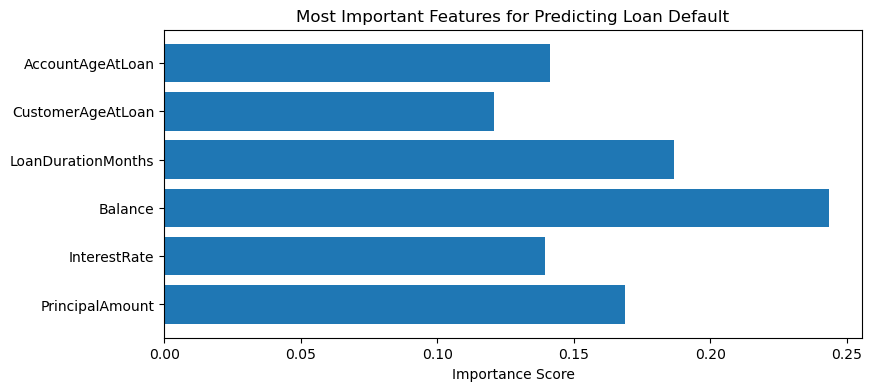

In [44]:
import matplotlib.pyplot as plt

features = ['PrincipalAmount', 'InterestRate', 'Balance', 'LoanDurationMonths', 'CustomerAgeAtLoan', 'AccountAgeAtLoan']

importances = model.feature_importances_

plt.figure(figsize=(9, 4))
plt.barh(features, importances)
plt.title('Most Important Features for Predicting Loan Default')
plt.xlabel('Importance Score')
plt.show()

# Exporting the clean data

In [54]:
final_df.to_csv('loan_data_for_dashboard.csv', index=False)

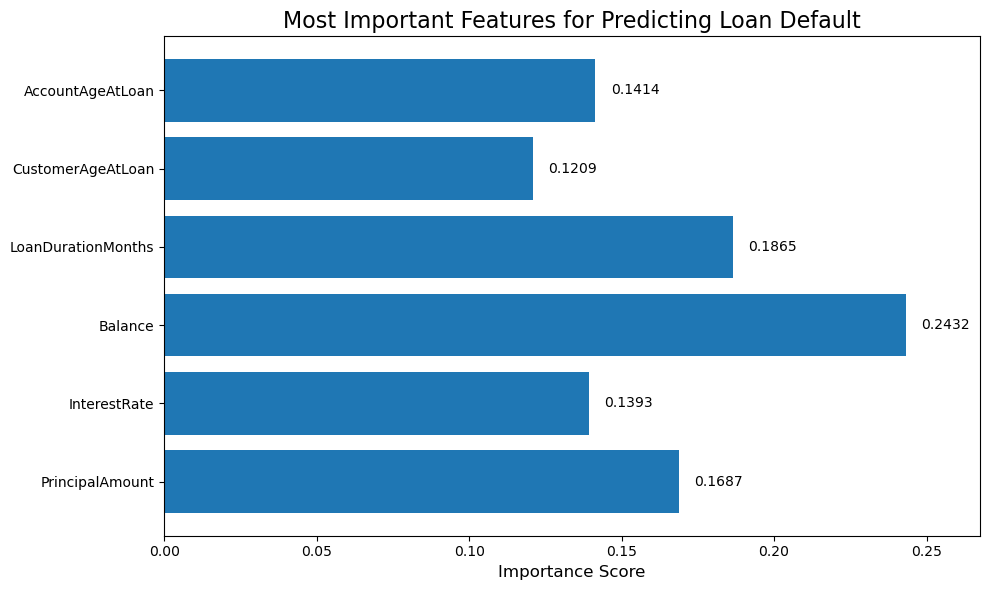

In [48]:
import matplotlib.pyplot as plt

# --- Get your data (same as before) ---
features = ['PrincipalAmount', 'InterestRate', 'Balance', 'LoanDurationMonths', 'CustomerAgeAtLoan', 'AccountAgeAtLoan']
importances = model.feature_importances_

# --- Create the plot ---
plt.figure(figsize=(10, 6)) # Made it a bit wider for the labels
bars = plt.barh(features, importances) # Store the bars in a 'bars' variable
plt.title('Most Important Features for Predicting Loan Default', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)

for bar in bars:
    # Get the width of the bar (which is the importance score)
    width = bar.get_width()
    
    # Add the text label
    plt.text(
        x=width + 0.005,
        y=bar.get_y() + bar.get_height() / 2, # Y position: centered vertically on the bar
        s=f'{width:.4f}',  # The text to display (formatted to 4 decimal places)
        va='center' # Vertical alignment
    )

# Adjust the x-axis to make sure the labels fit
plt.xlim(0, max(importances) * 1.1)

plt.tight_layout() # Cleans up the spacing
plt.show()